# ---------------------------------------------------------------
    Springboard Data Science Career Track - March 2 Cohort

    Date:  2020-06-29

    By: Justin Huang	

    Advisor: Blake Arensdorf
# ---------------------------------------------------------------

# Capstone Project 1: Statistical Data Analysis

At this point, you’ve obtained the dataset for your capstone project, cleaned, and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you’ve learned to explore the data.

Based on your dataset, the questions that interest you, and the results of the visualization techniques that you used previously, you should choose the most relevant statistical inference techniques. You aren’t expected to demonstrate all of them. Your specific situation determines how much time it’ll take you to complete this project. Talk to your mentor to determine the most appropriate approach to take for your project. You may find yourself revisiting the analytical framework that you first used to develop your proposal questions. It’s fine to refine your questions more as you get deeper into your data and find interesting patterns and answers. Remember to stay in touch with your mentor to remain focused on the scope of your project

Think of the following questions and apply them to your dataset:
- Are there variables that are particularly significant in terms of explaining the answer to your project question?
- Are there significant differences between subgroups in your data that may be relevant to your project aim?
- Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
- What are the most appropriate tests to use to analyze these relationships?

Submission: Write a 1-2 page report on the steps and findings of your inferential statistical analysis. Upload this report to your GitHub and submit a link. Eventually, this report will get incorporated into your milestone report.

In [2]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

In [34]:
np.random.seed(47)
N_rep = 10000

# helper functions (custom)

In [18]:
# we need a function called "diff of means"

def diff_of_means(data1, data2):
    """The difference in std dev of two arrays"""
    
    diff = np.mean(data1) - np.mean(data2)
    return diff

In [20]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(a=data, size=len(data), replace=True)
    return func(bs_sample)

In [21]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [41]:
def get_num_bins(vals):
    bins = 0
    maxv = max(vals)
    minv = min(vals)
    vals_q75, vals_q25 = np.percentile(vals, [75,25])    
    iqr = vals_q75 - vals_q25
    h = 2 * iqr / len(vals) ** (1/3)
    bins = (maxv - minv) / h
    return int(bins)

# Load the rawdata

In [4]:
games_df = pd.read_csv('.\data\indv_team_games_df.csv')
games_df

,Unnamed: 0,AST,AST_opp,FG3_PCT,FG3_PCT_opp,FG_PCT,FG_PCT_opp,FT_PCT,FT_PCT_opp,GAMES,...,REB,REB_opp,SEASON,TEAM_ABBR,TEAM_CITY,TEAM_ID,TEAM_ID_opp,TEAM_NICKNAME,dt_MONTH,dt_YEAR
0,0,22.0,20.0,0.229,0.226,0.354,0.402,0.900,0.762,1,...,47.0,61.0,2019,CHA,Charlotte,1610612766,1610612749,Hornets,3,2020
1,1,19.0,28.0,0.310,0.275,0.364,0.468,0.400,0.632,1,...,57.0,56.0,2019,MIN,Minnesota,1610612750,1610612742,Timberwolves,3,2020
2,2,25.0,27.0,0.542,0.488,0.592,0.505,0.805,0.650,1,...,37.0,37.0,2019,LAC,Los Angeles,1610612746,1610612755,Clippers,3,2020
3,3,38.0,24.0,0.500,0.263,0.566,0.461,0.700,0.897,1,...,41.0,36.0,2019,DEN,Denver,1610612743,1610612761,Nuggets,3,2020
4,4,18.0,23.0,0.257,0.429,0.407,0.413,0.885,0.667,1,...,51.0,42.0,2019,SAC,Sacramento,1610612758,1610612765,Kings,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43263,43263,21.0,13.0,0.222,0.167,0.440,0.308,0.719,0.743,1,...,44.0,50.0,2014,GSW,Golden State,1610612758,1610612758,Warriors,10,2014
43264,43264,19.0,23.0,0.125,0.379,0.407,0.448,0.808,0.773,1,...,43.0,42.0,2014,OKC,Oklahoma City,1610612757,1610612757,Thunder,10,2014
43265,43265,17.0,20.0,0.364,0.235,0.381,0.406,0.762,0.484,1,...,56.0,62.0,2014,ORL,Orlando,1610612740,1610612740,Magic,10,2014
43266,43266,17.0,23.0,0.381,0.500,0.487,0.529,0.842,0.813,1,...,33.0,38.0,2014,DAL,Dallas,1610612759,1610612759,Mavericks,10,2014


# split into 2 dataframes: before 2010 and 2011 and after

In [7]:
games_df['SEASON'].unique()

array([2019, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [13]:
games_df[games_df.SEASON < 2010]

,Unnamed: 0,AST,AST_opp,FG3_PCT,FG3_PCT_opp,FG_PCT,FG_PCT_opp,FT_PCT,FT_PCT_opp,GAMES,...,REB,REB_opp,SEASON,TEAM_ABBR,TEAM_CITY,TEAM_ID,TEAM_ID_opp,TEAM_NICKNAME,dt_MONTH,dt_YEAR
5620,5620,11.0,18.0,0.200,0.375,0.325,0.408,0.676,0.882,1,...,53.0,40.0,2009,LAL,Los Angeles,1610612747,1610612738,Lakers,6,2010
5621,5621,17.0,17.0,0.316,0.217,0.418,0.333,0.895,0.600,1,...,52.0,39.0,2009,LAL,Los Angeles,1610612747,1610612738,Lakers,6,2010
5622,5622,21.0,12.0,0.250,0.368,0.563,0.397,0.692,0.654,1,...,35.0,34.0,2009,BOS,Boston,1610612738,1610612747,Celtics,6,2010
5623,5623,15.0,13.0,0.250,0.350,0.446,0.451,0.826,0.818,1,...,41.0,34.0,2009,BOS,Boston,1610612738,1610612747,Celtics,6,2010
5624,5624,20.0,13.0,0.222,0.133,0.438,0.447,0.667,0.875,1,...,35.0,43.0,2009,BOS,Boston,1610612738,1610612747,Celtics,6,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36405,36405,18.0,24.0,0.214,0.160,0.398,0.324,0.737,0.700,1,...,58.0,55.0,2003,ATL,Atlanta,1610612740,1610612740,Hawks,10,2003
36406,36406,20.0,25.0,0.333,0.556,0.429,0.575,0.762,0.714,1,...,40.0,29.0,2003,POR,Portland,1610612762,1610612762,Trail Blazers,10,2003
36407,36407,16.0,25.0,0.250,0.350,0.408,0.440,0.824,0.533,1,...,44.0,39.0,2003,MIA,Miami,1610612755,1610612755,Heat,10,2003
36408,36408,14.0,20.0,0.500,0.100,0.361,0.425,0.810,0.769,1,...,43.0,38.0,2003,PHX,Phoenix,1610612759,1610612759,Suns,10,2003


In [14]:
games_2010_and_after = pd.DataFrame()
games_2010_before = pd.DataFrame()

# before 2010

In [24]:
games_before = games_df[games_df.SEASON < 2010]
games_before

,Unnamed: 0,AST,AST_opp,FG3_PCT,FG3_PCT_opp,FG_PCT,FG_PCT_opp,FT_PCT,FT_PCT_opp,GAMES,...,REB,REB_opp,SEASON,TEAM_ABBR,TEAM_CITY,TEAM_ID,TEAM_ID_opp,TEAM_NICKNAME,dt_MONTH,dt_YEAR
5620,5620,11.0,18.0,0.200,0.375,0.325,0.408,0.676,0.882,1,...,53.0,40.0,2009,LAL,Los Angeles,1610612747,1610612738,Lakers,6,2010
5621,5621,17.0,17.0,0.316,0.217,0.418,0.333,0.895,0.600,1,...,52.0,39.0,2009,LAL,Los Angeles,1610612747,1610612738,Lakers,6,2010
5622,5622,21.0,12.0,0.250,0.368,0.563,0.397,0.692,0.654,1,...,35.0,34.0,2009,BOS,Boston,1610612738,1610612747,Celtics,6,2010
5623,5623,15.0,13.0,0.250,0.350,0.446,0.451,0.826,0.818,1,...,41.0,34.0,2009,BOS,Boston,1610612738,1610612747,Celtics,6,2010
5624,5624,20.0,13.0,0.222,0.133,0.438,0.447,0.667,0.875,1,...,35.0,43.0,2009,BOS,Boston,1610612738,1610612747,Celtics,6,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36405,36405,18.0,24.0,0.214,0.160,0.398,0.324,0.737,0.700,1,...,58.0,55.0,2003,ATL,Atlanta,1610612740,1610612740,Hawks,10,2003
36406,36406,20.0,25.0,0.333,0.556,0.429,0.575,0.762,0.714,1,...,40.0,29.0,2003,POR,Portland,1610612762,1610612762,Trail Blazers,10,2003
36407,36407,16.0,25.0,0.250,0.350,0.408,0.440,0.824,0.533,1,...,44.0,39.0,2003,MIA,Miami,1610612755,1610612755,Heat,10,2003
36408,36408,14.0,20.0,0.500,0.100,0.361,0.425,0.810,0.769,1,...,43.0,38.0,2003,PHX,Phoenix,1610612759,1610612759,Suns,10,2003


# 2010 and after

In [25]:
games_after = games_df[games_df.SEASON >= 2010]
games_after

,Unnamed: 0,AST,AST_opp,FG3_PCT,FG3_PCT_opp,FG_PCT,FG_PCT_opp,FT_PCT,FT_PCT_opp,GAMES,...,REB,REB_opp,SEASON,TEAM_ABBR,TEAM_CITY,TEAM_ID,TEAM_ID_opp,TEAM_NICKNAME,dt_MONTH,dt_YEAR
0,0,22.0,20.0,0.229,0.226,0.354,0.402,0.900,0.762,1,...,47.0,61.0,2019,CHA,Charlotte,1610612766,1610612749,Hornets,3,2020
1,1,19.0,28.0,0.310,0.275,0.364,0.468,0.400,0.632,1,...,57.0,56.0,2019,MIN,Minnesota,1610612750,1610612742,Timberwolves,3,2020
2,2,25.0,27.0,0.542,0.488,0.592,0.505,0.805,0.650,1,...,37.0,37.0,2019,LAC,Los Angeles,1610612746,1610612755,Clippers,3,2020
3,3,38.0,24.0,0.500,0.263,0.566,0.461,0.700,0.897,1,...,41.0,36.0,2019,DEN,Denver,1610612743,1610612761,Nuggets,3,2020
4,4,18.0,23.0,0.257,0.429,0.407,0.413,0.885,0.667,1,...,51.0,42.0,2019,SAC,Sacramento,1610612758,1610612765,Kings,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43263,43263,21.0,13.0,0.222,0.167,0.440,0.308,0.719,0.743,1,...,44.0,50.0,2014,GSW,Golden State,1610612758,1610612758,Warriors,10,2014
43264,43264,19.0,23.0,0.125,0.379,0.407,0.448,0.808,0.773,1,...,43.0,42.0,2014,OKC,Oklahoma City,1610612757,1610612757,Thunder,10,2014
43265,43265,17.0,20.0,0.364,0.235,0.381,0.406,0.762,0.484,1,...,56.0,62.0,2014,ORL,Orlando,1610612740,1610612740,Magic,10,2014
43266,43266,17.0,23.0,0.381,0.500,0.487,0.529,0.842,0.813,1,...,33.0,38.0,2014,DAL,Dallas,1610612759,1610612759,Mavericks,10,2014


# Steps

# 1) Hypothesis

Has Scoring Increased From The 2010-2011 Season? Is it possible that the observed difference is by chance? (since we only have 2000 to 2010 data)

> H0 - Null Hypothesis

There is *no* difference in the means between score before vs after 2010 season.
In otherwords, the avg pts scored in the NBA has not changed over the years.

> HA - Alternative Hypothesis

There *is* a difference in the means between score before vs after 2010 season.

This is a result of the NBA offense has evolving due to  rule changes and style of play (3 point shot becoming more popular).

# 2) Test Statistic

In [53]:
# we should use a test statistics of difference of means because our hypothesis is: what if the means are the same?

In [27]:
empirical_diff_mean = diff_of_means(games_after.PTS, games_before.PTS)
empirical_diff_mean

5.003299481180363

In [47]:
np.mean(games_after.PTS)

102.93476518672864

# 3) 95% CI and p-value

In [ ]:
# Here we need to shift the observed data so that both data sets have the same mean.
# we do this because our null hypothesis assumes that there is no difference between them, 
# hence they should have the same mean.

# this way each dataset has the same mean, but still keep their respective std deviations.

In [28]:
mean_pts = np.mean(games_before.PTS)
mean_pts

97.93146570554828

In [30]:
# Generate shifted arrays
games_before_shifted = games_before.PTS - np.mean(games_before.PTS) + mean_pts
games_before_shifted

5620     83.0
5621     89.0
5622     92.0
5623     96.0
5624     84.0
         ... 
36405    83.0
36406    92.0
36407    74.0
36408    82.0
36409    93.0
Name: PTS, Length: 18312, dtype: float64

In [32]:
games_after_shifted = games_after.PTS - np.mean(games_after.PTS) + mean_pts
games_after_shifted

0         79.996701
1         85.996701
2        130.996701
3        127.996701
4        100.996701
            ...    
43263     89.996701
43264     83.996701
43265     78.996701
43266     94.996701
43267    102.996701
Name: PTS, Length: 24956, dtype: float64

In [33]:
#draw replicates from the shifted arrays

In [35]:
bs_replicates_games_before_mean = draw_bs_reps(data=games_before_shifted, func=np.mean, size=N_rep)

In [36]:
bs_replicates_games_after_mean = draw_bs_reps(data=games_after_shifted, func=np.mean, size=N_rep)

In [48]:
bs_replicates_mean = bs_replicates_games_after_mean - bs_replicates_games_before_mean
bs_replicates_mean

array([-0.14860086,  0.06712067, -0.08813161, ...,  0.05327338,
       -0.15989478,  0.03760627])

In [49]:
# Compute and print p-value: p

p = np.sum(np.abs(bs_replicates_mean) > empirical_diff_mean) / len(bs_replicates_mean)

print('p-value =', p)

p-value = 0.0


In [50]:
print(np.percentile(a=bs_replicates_mean, q=2.5), np.percentile(a=bs_replicates_mean, q=97.5))

-0.2427966762349353 0.24138836602309152


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


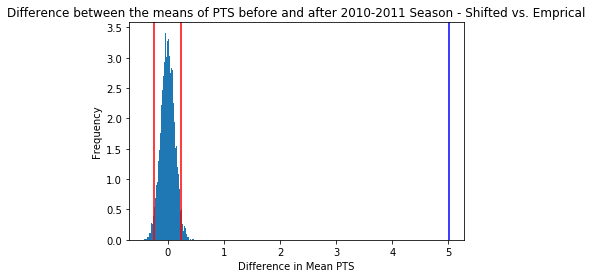

In [51]:
_ = plt.hist(bs_replicates_mean, bins=get_num_bins(bs_replicates_mean), normed=True)

_ = plt.axvline(np.percentile(a=bs_replicates_mean, q=2.5), color='r')
_ = plt.axvline(np.percentile(a=bs_replicates_mean, q=97.5), color='r')

_ = plt.axvline(empirical_diff_mean, color='b')

plt.title('Difference between the means of PTS before and after 2010-2011 Season - Shifted vs. Emprical')
plt.xlabel('Difference in Mean PTS')
plt.ylabel('Frequency')

plt.show()

# Conclusion

The p-value tells you that there is about a 0.0% chance 

that you would get the difference of means 

observed in the experiment if mean scores were exactly the same. 

**Therefore we reject the null hypothesis and accept the alternative hypothesis.